# 소비자 데이터 분석
2023.11.04 ~ 2023.11.05

## 1. 데이터셋 개요

- **주제: Customer Shopping Trends Dataset (소비자 쇼핑 트렌드 데이터셋)**
- 설명: 이 데이터셋은 고객의 쇼핑 선호도와 관련된 다양한 기능을 포함하고 있으며, 고객의 연령, 성별, 구매 금액, 선호 결제 방법, 구매 빈도, 피드백 등급 등을 포함하고 있으며, 구매 품목의 종류, 쇼핑 빈도, 선호 쇼핑 시즌, 프로모션 오퍼와의 상호 작용에 대한 데이터를 포함하고 있습니다. 3900개의 기록을 보유한 이 데이터셋은 더 나은 의사 결정과 고객 중심 전략을 위해 데이터 중심의 통찰력을 적용하고자 하는 기업을 위한 기초 역할을 합니다.
- 출처: Kaggle (https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset)

## 2. 데이터셋 확인 및 EDA

### 2-1. 데이터셋 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
shopping_df = pd.read_csv('shopping_trends_updated.csv', index_col='Customer ID')
shopping_df

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly


In [9]:
shopping_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3900 entries, 1 to 3900
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3900 non-null   int64  
 1   Gender                  3900 non-null   object 
 2   Item Purchased          3900 non-null   object 
 3   Category                3900 non-null   object 
 4   Purchase Amount (USD)   3900 non-null   int64  
 5   Location                3900 non-null   object 
 6   Size                    3900 non-null   object 
 7   Color                   3900 non-null   object 
 8   Season                  3900 non-null   object 
 9   Review Rating           3900 non-null   float64
 10  Subscription Status     3900 non-null   object 
 11  Shipping Type           3900 non-null   object 
 12  Discount Applied        3900 non-null   object 
 13  Promo Code Used         3900 non-null   object 
 14  Previous Purchases      3900 non-null   

In [29]:
shopping_df.isna().sum()

Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

결측치 없다!

### 2-2. 컬럼별 확인 (정수형)

In [10]:
shopping_df.describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


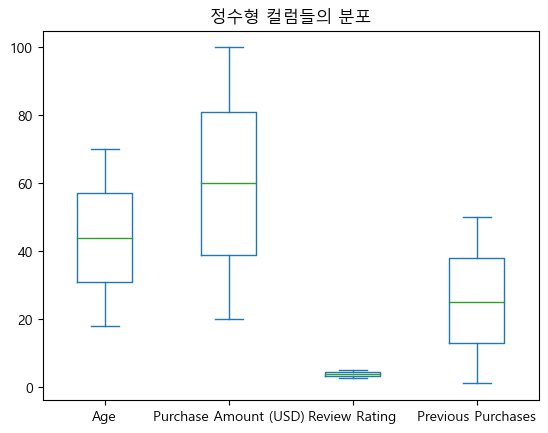

In [25]:
ints = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

shopping_df[ints].plot(kind='box')
plt.title('정수형 컬럼들의 분포')
plt.show()

이상치가 없는 예쁜 분포인 점 확인할 수 있다.

### 2-3. 컬럼별 확인 (Gender)

In [30]:
shopping_df['Gender'].value_counts()

Male      2652
Female    1248
Name: Gender, dtype: int64

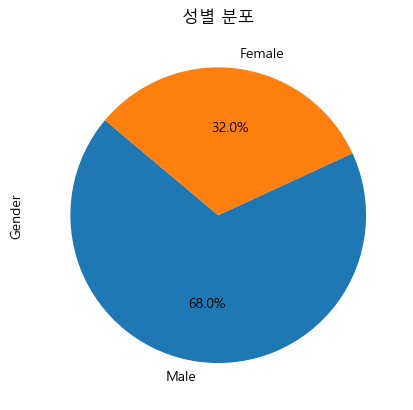

In [97]:
shopping_df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('성별 분포')
plt.show()

### 2-4. 컬럼별 확인 (구매 품목 관련)

In [38]:
shopping_df['Item Purchased'].value_counts()

Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: Item Purchased, dtype: int64

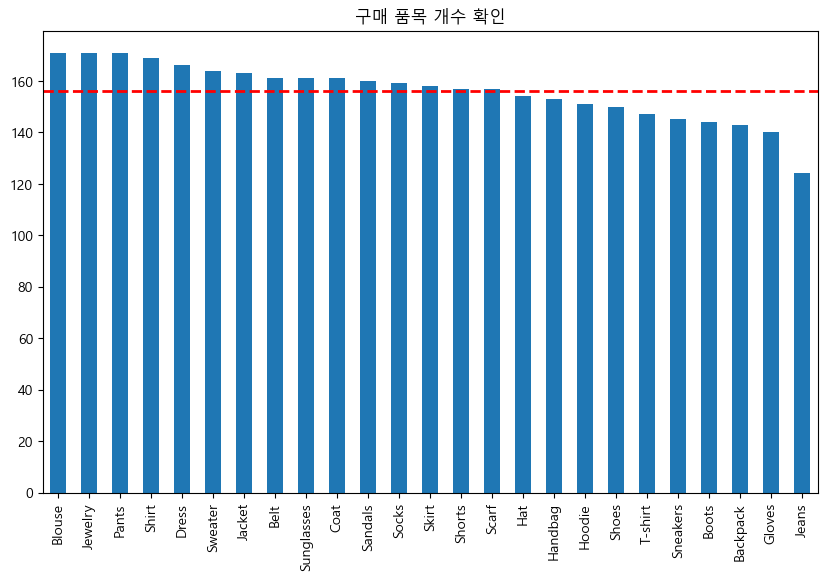

In [55]:
shopping_df['Item Purchased'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.axhline(shopping_df['Item Purchased'].value_counts().mean(), linestyle='--', linewidth=2, color='red')
plt.title('구매 품목 개수 확인')
plt.show()

In [54]:
shopping_df['Category'].value_counts()

Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: Category, dtype: int64

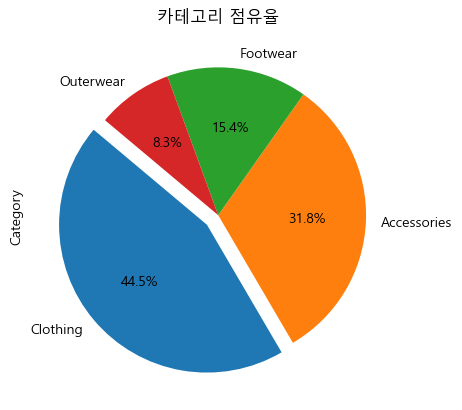

In [83]:
shopping_df['Category'].value_counts().plot(
    kind='pie',
    startangle=140,
    explode=[0.1 if i == 0 else 0 for i in range(len(shopping_df['Category'].value_counts()))],
    autopct='%1.1f%%')
plt.title('카테고리 점유율')
plt.show()

In [64]:
print(len(shopping_df.groupby('Category')))

4


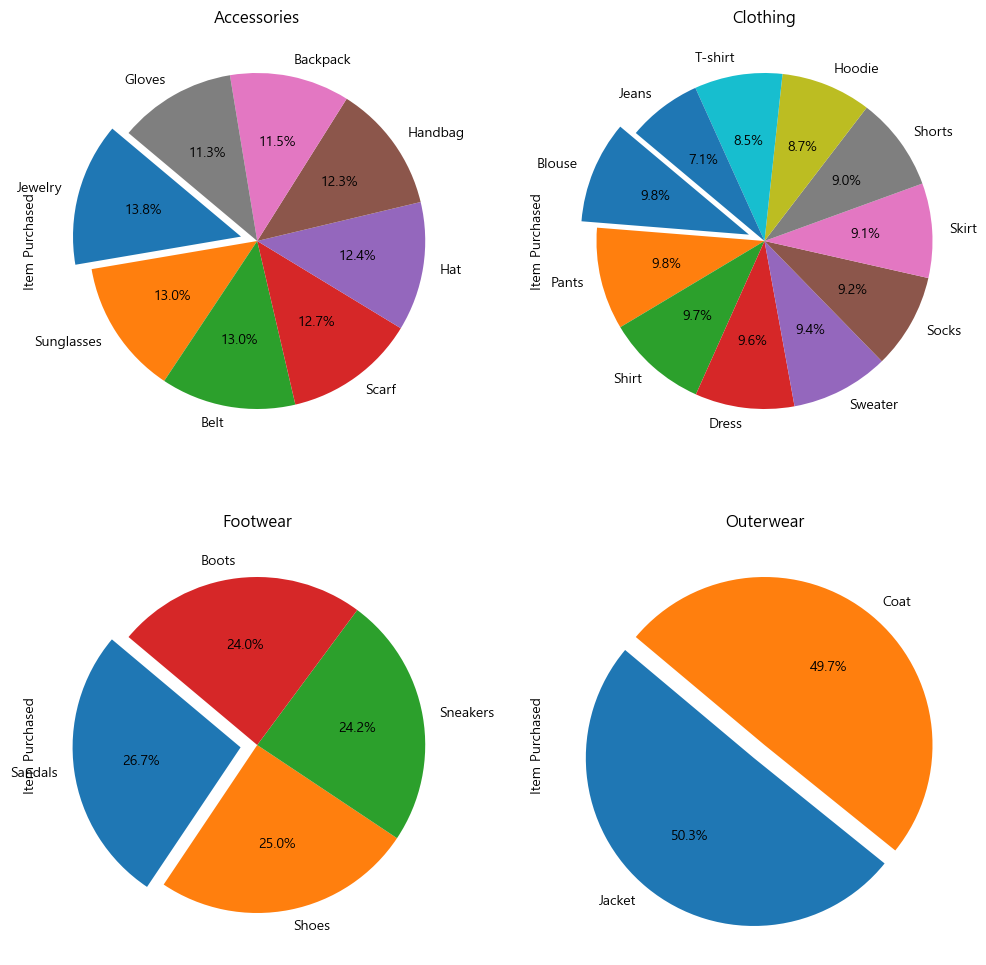

In [82]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
temp_num = len(shopping_df.groupby('Category'))

for category, df in shopping_df.groupby('Category')['Item Purchased']:
    df.value_counts().sort_values(ascending=False).plot(
        kind='pie',
        startangle=140,
        ax=axes[(4 - temp_num) // 2][(4 - temp_num) % 2],
        explode=[0.1 if i == 0 else 0 for i in range(len(df.value_counts()))],
        autopct='%1.1f%%'
    )
    axes[(4 - temp_num) // 2][(4 - temp_num) % 2].set_title(category)
    temp_num -= 1

plt.show()

### 2-5. 컬럼별 확인 (Size)

In [90]:
shopping_df['Size'].value_counts()

M     1755
L     1053
S      663
XL     429
Name: Size, dtype: int64

근데 옷뿐만 아니라 다른 품목들(ex. 악세서리)에도 S, M, L, XL 사이즈가 들어가 있나?

In [91]:
shopping_df.groupby('Category').agg({'Size': 'value_counts'})

Size
Category    Size      
Accessories M      562
            L      307
            S      230
            XL     141
Clothing    M      778
            L      481
            S      284
            XL     194
Footwear    M      267
            L      172
            S       93
            XL      67
Outerwear   M      148
            L       93
            S       56
            XL      27

들어가 있다.

### 2-6. 컬럼별 확인 (Season)

In [92]:
shopping_df['Season'].value_counts()

Spring    999
Fall      975
Winter    971
Summer    955
Name: Season, dtype: int64

계절과 품목을 연결해서 보면 재밌을 것 같다.

### 2-7. 컬럼별 확인 (Subscription Status)

In [93]:
shopping_df['Subscription Status'].value_counts()

No     2847
Yes    1053
Name: Subscription Status, dtype: int64

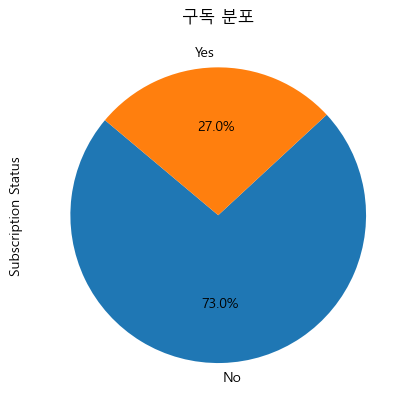

In [98]:
shopping_df['Subscription Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('구독 분포')
plt.show()

멤버십 구독과 관련하여 확인해 볼 흥미로운 요소들이 많을 것 같다. 예를 들어 멤버십 가입자들의 충성도. 아마 추후 분석에서 가장 중심이 될 컬럼이 되지 않을까 싶다(현재로서는).

### 2-8. 컬럼별 확인 (할인 관련)

In [99]:
shopping_df['Discount Applied'].value_counts()

No     2223
Yes    1677
Name: Discount Applied, dtype: int64

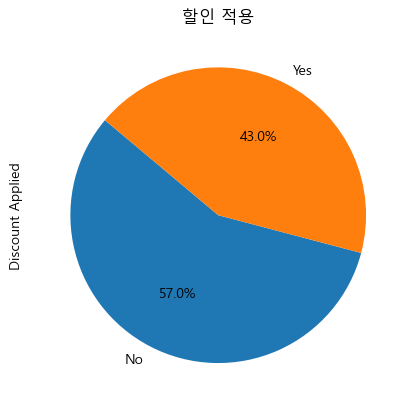

In [100]:
shopping_df['Discount Applied'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('할인 적용')
plt.show()

In [102]:
shopping_df['Promo Code Used'].value_counts()

No     2223
Yes    1677
Name: Promo Code Used, dtype: int64

In [105]:
shopping_df[shopping_df['Discount Applied'] != shopping_df['Promo Code Used']].size

0

```Discount Applied``` 컬럼과 ```Promo Code Used``` 컬럼은 완벽히 동일하다. 굳이 왜 두 개가 있는지 모르겠으니 지운다.

In [106]:
shopping_df = shopping_df.drop('Promo Code Used', axis=1)
shopping_df

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,14,Venmo,Fortnightly
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,2,Cash,Fortnightly
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,23,Credit Card,Weekly
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,49,PayPal,Weekly
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,32,Venmo,Weekly
3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,41,Bank Transfer,Bi-Weekly
3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,24,Venmo,Quarterly


### 2-9. 컬럼별 확인 (Frequency of Purchases)

In [107]:
shopping_df['Frequency of Purchases'].value_counts()

Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: Frequency of Purchases, dtype: int64

의문점: Every 3 Months와 Quarterly가 무슨 차이인지...?

## 3. 데이터 분석

(다음 분석에 대한 아이디어)

- 어떤 카테고리 / 어떤 품목이 가격이 비싼지? 가격으로 순위를 매길 때 상위 n개의 품목에서 할인 적용하는 비중이 높은지?
    - 비싼 품목을 '블랙 프라이데이' 같은 세일 이벤트의 전면에 내세우는 전략 채택 등...

- 어떤 카테고리 / 어떤 품목이 만족도가 높은지?
	- 만족도가 낮은 품목의 품질 개선 전략 수립 가능

- 어떤 카테고리 / 어떤 품목을 어떤 계절에 많이 사는지?
	- 계절별 마케팅 전략 수립 가능

- 멤버십에 가입된 유저들은 충성심이 높은지? 평균치에 비해 이전 구매 횟수가 높은지? 평균치에 비해 더 많은 비용을 지불하는지? 평균치에 비해 구매 빈도가 높은지?
	- 멤버십 서비스에 대한 전략 수립 가능 (혜택 증가라든지...?)